# VERİ GÖRSELLEŞTİRME 
---

## 📚 EĞİTİM AMAÇLARI
Bu eğitimde öğrenecekleriniz:
1. ✅ Veri görselleştirmenin neden kritik olduğu
2. ✅ Matplotlib ve Seaborn kütüphanelerini hakimiyetle kullanmak
3. ✅ Farklı veri türlerine uygun grafik türlerini seçmek
4. ✅ Korelasyon, dağılım ve kategorik analiz yapmak
5. ✅ Profesyonel, okuyucu dostu grafikler oluşturmak
6. ✅ Gerçek veri üzerinde EDA (Exploratory Data Analysis) yapmak

---

## 🎯 BÖLÜM 1: GİRİŞ VE KURULUŞ 

### Veri Görselleştirme Nedir?
**Tanım:** Sayısal ve kategorik verileri grafik, harita, şema gibi görsel öğelerle temsil etme sanatı.

**Neden Önemlidir?**
- 🧠 İnsan beyni grafikleri sayılar kadar hızlı anlayamaz → **90.000x daha hızlı** görsel bilgi işler
- 📊 Desenleri, trendi ve aykırı değerleri saniyeler içinde görebiliriz
- 🎯 Karmaşık ilişkileri basitçe iletişim kurarız
- 💡 Veri analisti / Data Scientist'in en önemli becerisidir

**Tarihçe:**
- 1642: William Playfair → İlk bar chart
- 1869: Charles Minard → Napoléon kampanyası (tarihinin en iyi grafiği)
- 1977: John Tukey → "Exploratory Data Analysis" kavramı
- 2010 sonrası: İnteraktif görselleştirme (Plotly, D3.js, Tableau)

### Kullanılacak Araçlar
| Kütüphane | Kullanım Amacı 
|-----------|----------------
| **Matplotlib** | Temel çizimler, tam kontrol 
| **Seaborn** | İstatistiksel grafikler, güzellik
| **Pandas** | Veri yükleme ve temizleme
| **NumPy** | Sayısal hesaplamalar 

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# 1. Matplotlib ayarları
plt.style.use('seaborn-v0_8-darkgrid')  # Grafik stili
sns.set_palette("husl")  # Renk paleti
%matplotlib inline

# 2. Pandas ayarları
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# 3. Rastgele sayı üretimi için seed (tekrarlanabilirlik)
np.random.seed(42)

print("✅ TÜM KÜTÜPHANELER BAŞARIYLA YÜKLENDİ")
print("\nKüllanılan Sürümler:")
print(f"  • Pandas: {pd.__version__}")
print(f"  • NumPy: {np.__version__}")
print(f"  • Matplotlib: {plt.matplotlib.__version__}")
print(f"  • Seaborn: {sns.__version__}")

✅ TÜM KÜTÜPHANELER BAŞARIYLA YÜKLENDİ

Küllanılan Sürümler:
  • Pandas: 2.3.2
  • NumPy: 2.3.3
  • Matplotlib: 3.10.6
  • Seaborn: 0.13.2


---

## 🎯 BÖLÜM 2: TEORİK TEMELLER - NEDEN, NASIL, NE ZAMAN 

### 2.1 Grafik Seçimi Karar Ağacı

**Soru 1: Kaç değişken görmek istiyorum?**
- **1 değişken** → Dağılım grafikleri (Histogram, Box Plot)
- **2 değişken** → İlişki grafikleri (Scatter, Line)
- **3+ değişken** → Heatmap, Pairplot, 3D

**Soru 2: Değişkenler ne tür?**
- **Kategorik** (erkek/kadın, şehir adları) → Bar Chart, Count Plot
- **Sayısal** (yaş, fiyat, sıcaklık) → Histogram, Scatter, Line
- **Karışık** (kategorik + sayısal) → Box Plot, Violin Plot

**Soru 3: Amacım ne?**
- **Dağılımı görmek** → Histogram, KDE
- **Eğilimi görmek** → Line Chart
- **İlişkiyi görmek** → Scatter, Correlation Heatmap
- **Karşılaştırma** → Bar Chart, Box Plot
- **Bileşenleri görmek** → Pie Chart, Stacked Bar

### 2.2 Grafik Türleri Referans Tablosu

| Grafik Türü | Amacı | Avantajları | Dezavantajları | Örnek Veri |
|------------|-------|------------|----------------|-----------|
| **Histogram** | Dağılımı görmek | Kolay anlaşılır | Bin seçimi kritik | Yaş dağılımı |
| **Line Chart** | Trendi görmek | Zaman serisi için ideal | Tek bir trend | Hisse senedi fiyatı |
| **Scatter Plot** | İlişkiyi görmek | Korelasyon belirgin | Overplotting riski | Boy vs Kilo |
| **Bar Chart** | Karşılaştırma | Kategoriler arası jüksek fark | Kategoriler fazlaysa karışık | Ülkelere göre GDP |
| **Box Plot** | Aykırı değer tespiti | Dört çeyrekler görülür | Veri sayısı gösterilmez | Yaş grubuna göre gelir |
| **Heatmap** | Korelasyon görmek | Renk kodu ile hızlı | Renk körlüğü riski | Tüm sayısal değişkenler |
| **Pairplot** | Tüm ilişkileri görmek | Kapsamlı | Çok değişken karmaşık | Iris dataset |
| **Violin Plot** | Dağılım detayı | Histogramdan daha güzel | Daha az tanıdık | Kategoriye göre fiyat |

### 2.3 Matplotlib vs Seaborn: Hangisi Kullanmalı?

**MATPLOTLIB**
- ✅ Tam kontrol, her şeyi özelleştirebilirsin
- ✅ Düşük seviye (low-level) grafik kütüphanesi
- ❌ Daha fazla kod yazmanız gerekiyor
- ❌ Varsayılan estetik eski görünüyor
- 💡 **Kullanım:** Çok özelleştirilmiş veya nadir grafiklerde

**SEABORN**
- ✅ Az kod, daha güzel grafikler
- ✅ İstatistiksel görselleme için optimize
- ✅ Matplotlib'in üzerine kurulu (gerçek esneklik)
- ❌ Matplotlib kadar kontrol vermez
- 💡 **Kullanım:** Hızlı analiz, EDA (Exploratory Data Analysis)

**PRATİK TAVSIYE:**
```
Başlangıç → Seaborn
Detay istenince → Seaborn + Matplotlib kombinasyonu
Çok özel ihtiyaç → Pure Matplotlib
```

---

## 🎯 BÖLÜM 3: VERİ SETİ YÜKLEME VE KEŞİF 

In [4]:
# ============================================================================
# BÖLÜM 3: VERİ SETI YÜKLEME VE KEŞFI
# ============================================================================
# Farklı kaynakların nasıl yükleneceğini göstereceğiz

# 1. SEABORN VERİ SETLERİ (Hazır veri setleri)
print("=" * 70)
print("📊 VERİ SETI YÜKLEME")
print("=" * 70)

# Seaborn kütüphanesi sık kullanılan veri setlerini dahili olarak tutar
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

print("\n1️⃣ TIPS DATASET (Restorandaki Bahşişler)")
print("-" * 70)
ncols = tips.shape[1]
nrows = tips.shape[0]
print(f"Boyut: {nrows} satir, {ncols} sutun")
print(f"Sütunlar: {list(tips.columns)}")
print(f"\nİlk 5 satır:")
print(tips.head())
print(f"\nTip Bilgileri:")
print(tips.info())

print("\n" + "=" * 70)
print("2️⃣ TITANIC DATASET (Titanic Yolcu Bilgileri)")
print("-" * 70)
ncols_t = titanic.shape[1]
nrows_t = titanic.shape[0]
print(f"Boyut: {nrows_t} satir, {ncols_t} sutun")
print(f"\nİlk 5 satır:")
print(titanic.head())
print(f"\nSütun Açıklamaları:")
for col in titanic.columns[:5]:
    nunique = titanic[col].nunique()
    dtype = titanic[col].dtype
    print(f"  • {col}: {dtype} ({nunique} benzersiz deger)")

print("\n" + "=" * 70)
print("3️⃣ TÜRKİYE EMLAK VERİ SETİ (Dataset.csv)")
print("-" * 70)
# Kendi dataset'i yükleme
try:
    df = pd.read_csv('../dataset.csv')
    print(f"✅ Dataset basarili sekilde yuklendi!")
    ncols_d = df.shape[1]
    nrows_d = df.shape[0]
    print(f"Boyut: {nrows_d} satir, {ncols_d} sutun")
    print(f"Sütunlar: {list(df.columns)}")
    print(f"\nİlk 5 satır:")
    print(df.head())
    print(f"\nSütun Açıklamaları:")
    print(df.describe())
except FileNotFoundError:
    print("⚠️ Dataset.csv dosyasi bulunamadi. Seaborn veri setleriyle devam ediyoruz.")
    df = tips.copy()
    print("Tips dataset kullanilacaktir.")

📊 VERİ SETI YÜKLEME

1️⃣ TIPS DATASET (Restorandaki Bahşişler)
----------------------------------------------------------------------
Boyut: 244 satir, 7 sutun
Sütunlar: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

İlk 5 satır:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Tip Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time       

---

## 🎯 BÖLÜM 4: MATPLOTLIB TEMELLERİ

### 4.1 Matplotlib Mimarisi Açıklaması

```
fig = plt.figure()          ← Ana tuval (Figure)
  ├─ ax = fig.add_subplot() ← Alt grafik alanı (Axes)
      ├─ plot, scatter       ← Grafik fonksiyonları
      ├─ set_xlabel()        ← Eksen etiketleri
      └─ set_title()         ← Başlık
```

**Temel Konseptler:**
- **Figure:** Tüm grafik penceresinin adı (1 figür birden fazla grafik içerebilir)
- **Axes:** Gerçek grafik çizilen yer (başlık, eksen etiketleri, veriler)
- **Artist:** Figür içindeki her element (çizgi, metin, marker vb.)

### 4.2 Matplotlib Söz Dizimine Giriş

**2 Ana Kullanım Şekli:**

```python
# STYLE 1: Fonksiyon Tabanlı (Simple)
plt.plot(x, y)
plt.title("Başlık")
plt.show()

# STYLE 2: Object Oriented (Professional)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y)
ax.set_title("Başlık")
plt.show()
```

**Ne zaman hangisi kullanılır?**
- Hızlı keşif → Style 1
- Profesyonel rapor → Style 2
- **Bu eğitimde: Her ikisini de göstereceğiz!**

---


📈 MATPLOTLIB TEMEL GRAFIK TÜRLERI

1️⃣ LINE PLOT - Zaman serisi, eğilim göstermek için ideal
----------------------------------------------------------------------


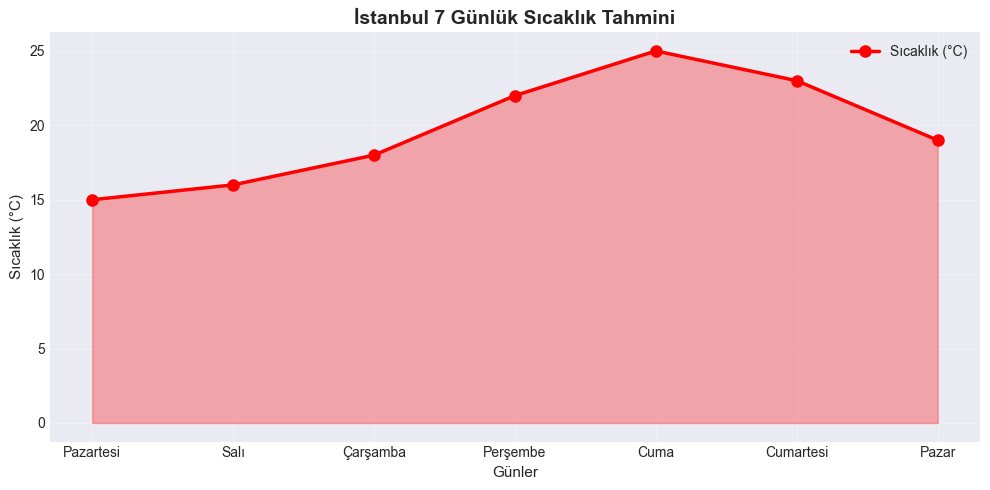

✅ Çizgi grafik başarıyla oluşturuldu!
💡 Not: fill_between() ile altını doldurarak görsel çekiciliği artırdık.

2️⃣ SCATTER PLOT - İki sayısal değişken arasındaki ilişki
----------------------------------------------------------------------


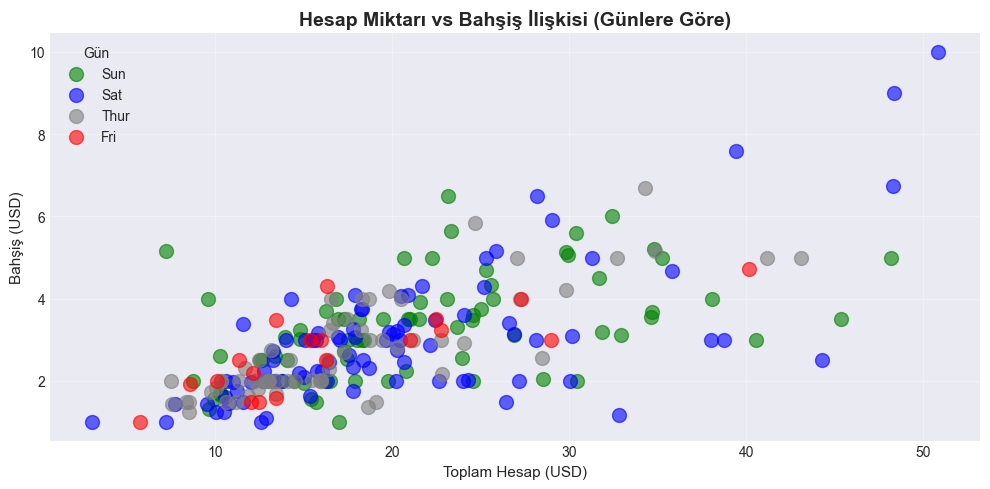

✅ Scatter plot başarıyla oluşturuldu!
💡 Not: Scatter plot korelasyon bulmanın en hızlı yoludur.

3️⃣ BAR CHART - Kategorik karşılaştırma
----------------------------------------------------------------------


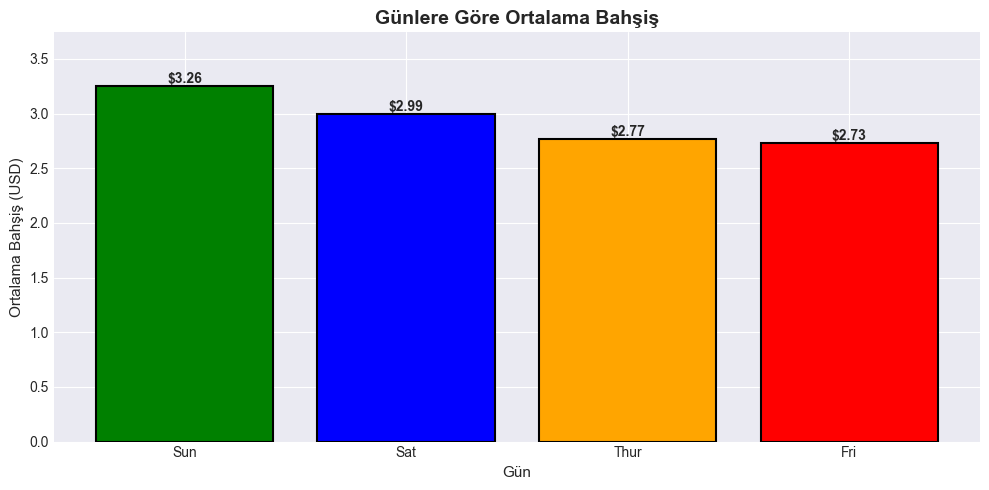

✅ Bar chart başarıyla oluşturuldu!
💡 Not: Kategorik değişkenleri karşılaştırırken bar chart kullanın.


In [ ]:
# ============================================================================
# BÖLÜM 4.3: MATPLOTLIB - TEMEL ÇIZIMLER PRATIĞI
# ============================================================================

print("\n" + "=" * 70)
print("📈 MATPLOTLIB TEMEL GRAFIK TÜRLERI")
print("=" * 70)

# --- 1. LINE PLOT (Çizgi Grafiği) ---
print("\n1️⃣ LINE PLOT - Zaman serisi, eğilim göstermek için ideal")
print("-" * 70)

# Örnek veri oluştur: İstanbul'da 7 günlük sıcaklık
günler = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
sıcaklık = [15, 16, 18, 22, 25, 23, 19]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(günler, sıcaklık, marker='o', linewidth=2.5, markersize=8, color='red', label='Sıcaklık (°C)')

# Estetik iyileştirmeler
ax.fill_between(range(len(günler)), sıcaklık, alpha=0.3, color='red')
ax.set_title('İstanbul 7 Günlük Sıcaklık Tahmini', fontsize=14, fontweight='bold')
ax.set_xlabel('Günler', fontsize=11)
ax.set_ylabel('Sıcaklık (°C)', fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("✅ Çizgi grafik başarıyla oluşturuldu!")
print("💡 Not: fill_between() ile altını doldurarak görsel çekiciliği artırdık.")

# --- 2. SCATTER PLOT (Saçılım Grafiği) ---
print("\n2️⃣ SCATTER PLOT - İki sayısal değişken arasındaki ilişki")
print("-" * 70)

# Tips veri setinden örnek
fig, ax = plt.subplots(figsize=(10, 5))

# Rengini 'day' kategorisine göre ayarla
colors = {'Fri': 'red', 'Sat': 'blue', 'Sun': 'green', 'Thurs': 'orange'}
for day in tips['day'].unique():
    mask = tips['day'] == day
    ax.scatter(tips[mask]['total_bill'], tips[mask]['tip'], 
              label=day, s=100, alpha=0.6, color=colors.get(day, 'gray'))

ax.set_title('Hesap Miktarı vs Bahşiş İlişkisi (Günlere Göre)', fontsize=14, fontweight='bold')
ax.set_xlabel('Toplam Hesap (USD)', fontsize=11)
ax.set_ylabel('Bahşiş (USD)', fontsize=11)
ax.legend(title='Gün', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Scatter plot başarıyla oluşturuldu!")
print("💡 Not: Scatter plot korelasyon bulmanın en hızlı yoludur.")

# --- 3. BAR CHART (Sütun Grafiği) ---
print("\n3️⃣ BAR CHART - Kategorik karşılaştırma")
print("-" * 70)

# Günlere göre ortalama bahşiş
günlük_bahşiş = tips.groupby('day')['tip'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(günlük_bahşiş.index, günlük_bahşiş.values, color=['green', 'blue', 'orange', 'red'], edgecolor='black', linewidth=1.5)

# Değerleri sütunların üstüne yazı olarak ekle
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.2f}', ha='center', va='bottom', fontweight='bold')

ax.set_title('Günlere Göre Ortalama Bahşiş', fontsize=14, fontweight='bold')
ax.set_xlabel('Gün', fontsize=11)
ax.set_ylabel('Ortalama Bahşiş (USD)', fontsize=11)
ax.set_ylim(0, max(günlük_bahşiş.values) * 1.15)

plt.tight_layout()
plt.show()

print("✅ Bar chart başarıyla oluşturuldu!")
print("💡 Not: Kategorik değişkenleri karşılaştırırken bar chart kullanın.")


📊 DAĞILIM ANALİZİ - VERİNİN NASIL DAĞILDIĞINI ANLAMAK

1️⃣ HISTOGRAM - Veri dağılımının sıklık gösterimi
----------------------------------------------------------------------


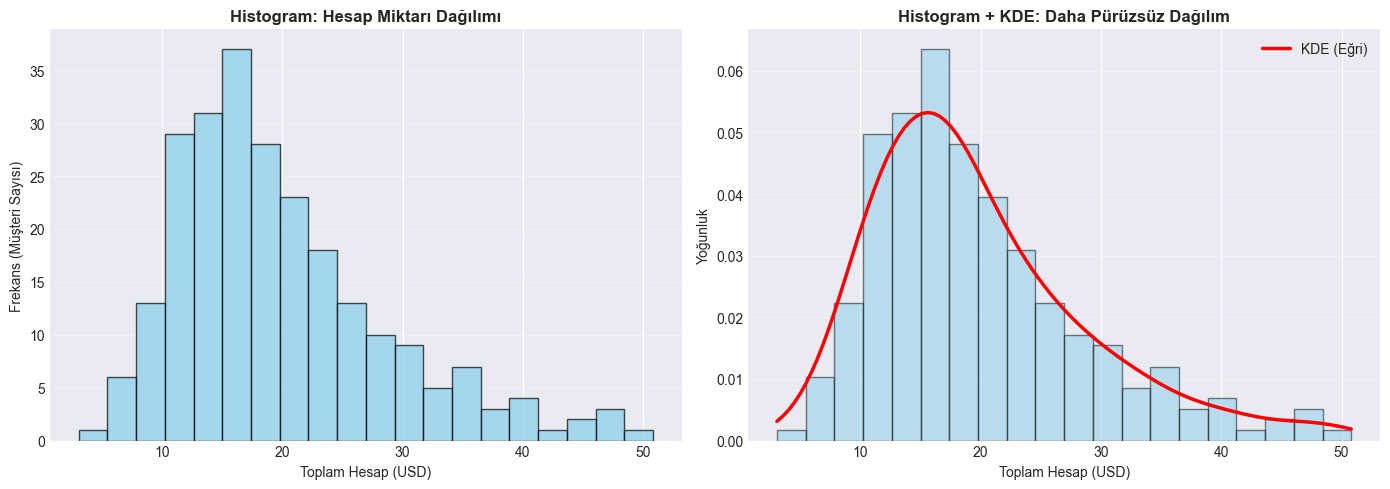

✅ Histogram ve KDE gösterimi tamamlandı!
💡 Histogram: Bar sayısı (bins) seçimi çok önemlidir.
   - Çok az bin: Detay kaybı
   - Çok fazla bin: Gürültü / derlenme sorunu
💡 KDE: Histogramdaki boşluklarını doldurarak daha pürüzsüz gösteriş verir.

2️⃣ BOX PLOT - Aykırı değerleri ve dağılımı görmek
----------------------------------------------------------------------


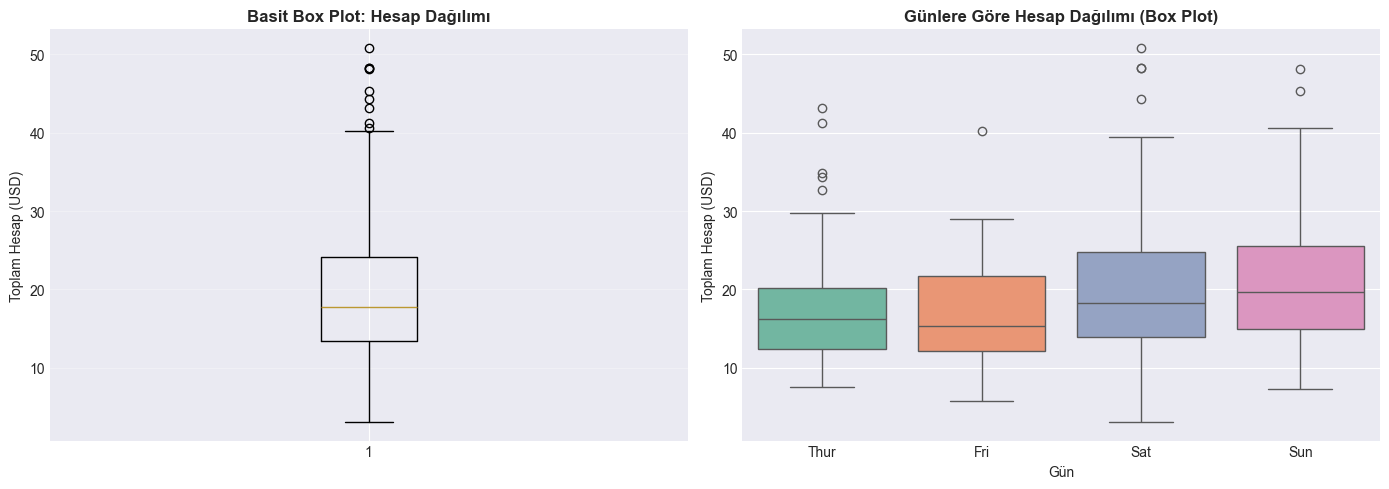


📌 BOX PLOT ELEMANLARININ AÇILANMASI:
----------------------------------------------------------------------
• Min Değer: 3.07
• Q1 (1. Çeyrek): 13.35  (verinin %25'i bundan küçük)
• Q2 (Medyan): 17.80  (verinin tam ortası)
• Q3 (3. Çeyrek): 24.13  (verinin %75'i bundan küçük)
• Max Değer: 50.81
• IQR (Q3-Q1): 10.78  (ortadaki %50'nin aralığı)
• Aykırı Değerler: 50.81 > 40.30 (Q3 + 1.5*IQR)

3️⃣ VIOLIN PLOT - Histogramı döndürüp sıkıştırdık!
----------------------------------------------------------------------


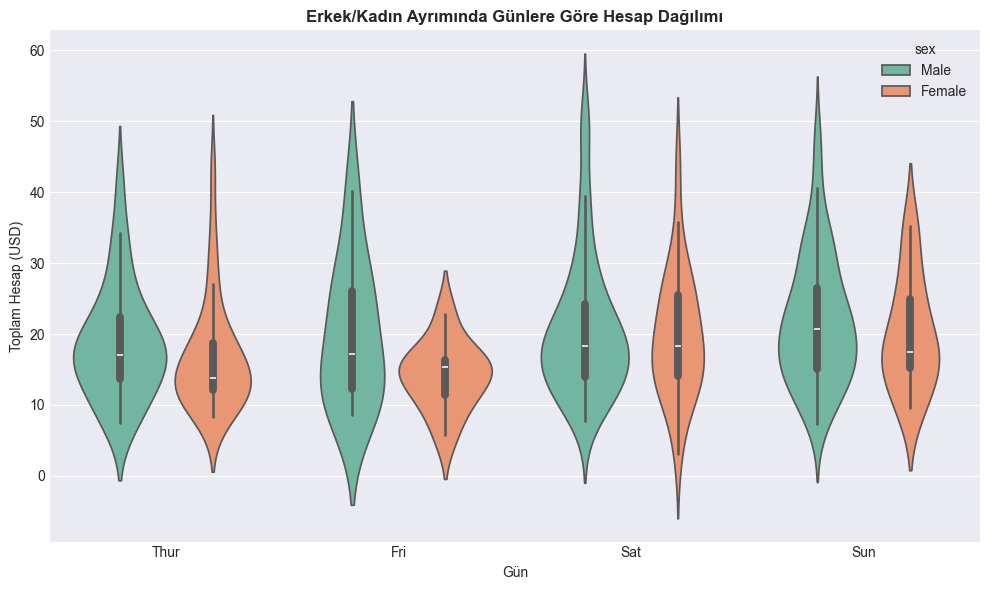

✅ Violin plot başarıyla oluşturuldu!
💡 Box plot ile histogram'ı kombine eden güzel bir grafiktir.


In [ ]:
# ============================================================================
# BÖLÜM 5: DAĞILIM ANALİZİ (Distribution Analysis) 
# ============================================================================

print("\n" + "=" * 70)
print("📊 DAĞILIM ANALİZİ - VERİNİN NASIL DAĞILDIĞINI ANLAMAK")
print("=" * 70)

# --- 1. HISTOGRAM + KDE (Kernel Density Estimation) ---
print("\n1️⃣ HISTOGRAM - Veri dağılımının sıklık gösterimi")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(tips['total_bill'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram: Hesap Miktarı Dağılımı', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Toplam Hesap (USD)', fontsize=10)
axes[0].set_ylabel('Frekans (Müşteri Sayısı)', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Histogram + KDE (Kernel Density Estimation)
axes[1].hist(tips['total_bill'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, density=True)
from scipy import stats
kde = stats.gaussian_kde(tips['total_bill'])
x_range = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 100)
axes[1].plot(x_range, kde(x_range), 'r-', linewidth=2.5, label='KDE (Eğri)')
axes[1].set_title('Histogram + KDE: Daha Pürüzsüz Dağılım', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Toplam Hesap (USD)', fontsize=10)
axes[1].set_ylabel('Yoğunluk', fontsize=10)
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Histogram ve KDE gösterimi tamamlandı!")
print("💡 Histogram: Bar sayısı (bins) seçimi çok önemlidir.")
print("   - Çok az bin: Detay kaybı")
print("   - Çok fazla bin: Gürültü / derlenme sorunu")
print("💡 KDE: Histogramdaki boşluklarını doldurarak daha pürüzsüz gösteriş verir.")

# --- 2. BOX PLOT (Kutu Grafiği) ---
print("\n2️⃣ BOX PLOT - Aykırı değerleri ve dağılımı görmek")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Basit Box Plot
axes[0].boxplot(tips['total_bill'], vert=True)
axes[0].set_title('Basit Box Plot: Hesap Dağılımı', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Toplam Hesap (USD)', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Kategoriye göre Box Plot (Seaborn ile)
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[1], palette='Set2')
axes[1].set_title('Günlere Göre Hesap Dağılımı (Box Plot)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Gün', fontsize=10)
axes[1].set_ylabel('Toplam Hesap (USD)', fontsize=10)

plt.tight_layout()
plt.show()

# Box Plot açıklaması
print("\n📌 BOX PLOT ELEMANLARININ AÇILANMASI:")
print("-" * 70)
q1 = tips['total_bill'].quantile(0.25)
q2 = tips['total_bill'].quantile(0.50)  # Medyan
q3 = tips['total_bill'].quantile(0.75)
iqr = q3 - q1

print(f"• Min Değer: {tips['total_bill'].min():.2f}")
print(f"• Q1 (1. Çeyrek): {q1:.2f}  (verinin %25'i bundan küçük)")
print(f"• Q2 (Medyan): {q2:.2f}  (verinin tam ortası)")
print(f"• Q3 (3. Çeyrek): {q3:.2f}  (verinin %75'i bundan küçük)")
print(f"• Max Değer: {tips['total_bill'].max():.2f}")
print(f"• IQR (Q3-Q1): {iqr:.2f}  (ortadaki %50'nin aralığı)")
print(f"• Aykırı Değerler: {tips['total_bill'].max():.2f} > {q3 + 1.5*iqr:.2f} (Q3 + 1.5*IQR)")

# --- 3. VIOLIN PLOT (Keman Grafiği) ---
print("\n3️⃣ VIOLIN PLOT - Histogramı döndürüp sıkıştırdık!")
print("-" * 70)

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', palette='Set2', ax=ax)
ax.set_title('Erkek/Kadın Ayrımında Günlere Göre Hesap Dağılımı', fontsize=12, fontweight='bold')
ax.set_xlabel('Gün', fontsize=10)
ax.set_ylabel('Toplam Hesap (USD)', fontsize=10)

plt.tight_layout()
plt.show()

print("✅ Violin plot başarıyla oluşturuldu!")
print("💡 Box plot ile histogram'ı kombine eden güzel bir grafiktir.")

---

## 🎯 BÖLÜM 6: KATEGORİK ANALİZ (Categorical Analysis)
### 6.1 Kategorik Grafik Türleri

| Grafik | Amacı | En İyi Durum |
|--------|-------|-------------|
| **Count Plot** | Kategorilerin frekansı | Her kategori sayısı bilinmek istenilince |
| **Bar Plot** | Kategoriye göre sayısal ortalaması | Ortalama karşılaştırması |
| **Hue Parameter** | Renk kodlama | Alt kategorilendirme |
| **Stacked Bar** | Bileşenleri görmek | Toplam + parçaları |

### 6.2 Seaborn `hue` Parametresi Kullanımı

**`hue` nedir?** Renk kodlaması yoluyla 3. bir kategorik değişken ekleme.

```python
# 1. Cinsiyet (x) → Hesap (y) → Gün (renk/hue)
sns.barplot(x='sex', y='total_bill', data=tips, hue='day')

# 2. Gün (x) → Bahşiş (y) → Sigara İçme Durumu (renk/hue)
sns.barplot(x='day', y='tip', data=tips, hue='smoker', palette='RdYlGn')
```

---

In [ ]:
# ============================================================================
# BÖLÜM 6: KATEGORİK VERİ ANALİZİ (Categorical Analysis)
# ============================================================================

print("\n" + "=" * 70)
print("🎨 KATEGORİK VERİ GÖRSELLEŞTİRME")
print("=" * 70)

# --- 1. COUNT PLOT ---
print("\n1️⃣ COUNT PLOT - Her kategorinin frekansı")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gün dağılımı
sns.countplot(x='day', data=tips, ax=axes[0], palette='Set2')
axes[0].set_title('Gün Dağılımı (Toplam Müşteri Sayısı)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Gün', fontsize=10)
axes[0].set_ylabel('Sayı', fontsize=10)

# Cinsiyete göre sigara içme durumu
sns.countplot(x='sex', hue='smoker', data=tips, ax=axes[1], palette='husl')
axes[1].set_title('Cinsiyete Göre Sigara İçme Durumu', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cinsiyet', fontsize=10)
axes[1].set_ylabel('Sayı', fontsize=10)
axes[1].legend(title='Sigara', labels=['İçmiyor', 'İçiyor'], fontsize=9)

plt.tight_layout()
plt.show()

print("✅ Count plot başarıyla oluşturuldu!")
print("💡 Not: hue parametresi ile bir başka kategorik değişkeni ekledik (sigara içme).")

# --- 2. BAR PLOT (Kategoriye Göre Ortalama) ---
print("\n2️⃣ BAR PLOT - Kategoriye Göre Ortalama/Toplam")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Günlere göre ortalama hesap
sns.barplot(x='day', y='total_bill', data=tips, ax=axes[0], palette='viridis', errorbar='sd')
axes[0].set_title('Günlere Göre Ortalama Hesap (SD gösterimli)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Gün', fontsize=10)
axes[0].set_ylabel('Ortalama Hesap (USD)', fontsize=10)

# Cinsiyete göre hesap (sigara ayrımı ile)
sns.barplot(x='sex', y='total_bill', hue='smoker', data=tips, ax=axes[1], palette='coolwarm')
axes[1].set_title('Cinsiyet & Sigara Durumuna Göre Ortalama Hesap', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cinsiyet', fontsize=10)
axes[1].set_ylabel('Ortalama Hesap (USD)', fontsize=10)
axes[1].legend(title='Sigara', labels=['İçmiyor', 'İçiyor'], fontsize=9)

plt.tight_layout()
plt.show()

print("✅ Bar plot başarıyla oluşturuldu!")
print("💡 Not: errorbar='sd' ile standart sapmayı gösteren çubuklar eklendi (belirsizlik).")

# --- 3. LİNE PLOT (KATEGORİK + TRENDİ) ---
print("\n3️⃣ LINE PLOT - Kategoriye Göre Trend")
print("-" * 70)

fig, ax = plt.subplots(figsize=(10, 6))

# Bağlantısal veri hazırla: Yaş gruplarına göre gelir (örnek veri)
age_groups = pd.DataFrame({
    'Age_Group': ['18-25', '26-35', '36-45', '46-55', '56-65'],
    'Average_Income': [45000, 65000, 85000, 95000, 80000],
    'Income_2023': [48000, 70000, 92000, 100000, 85000]
})

ax.plot(age_groups['Age_Group'], age_groups['Average_Income'], marker='o', label='2022', linewidth=2, markersize=8)
ax.plot(age_groups['Age_Group'], age_groups['Income_2023'], marker='s', label='2023', linewidth=2, markersize=8)
ax.set_title('Yaş Gruplarına Göre Ortalama Gelir Trendi', fontsize=12, fontweight='bold')
ax.set_xlabel('Yaş Grubu', fontsize=10)
ax.set_ylabel('Ortalama Gelir (USD)', fontsize=10)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Line plot başarıyla oluşturuldu!")
print("💡 Not: Kategorik değişkenlerde eğilim göstermek için line plot kullanılabilir.")

In [ ]:
# ============================================================================
# BÖLÜM 7: KORELASYON VE İLİŞKİ ANALİZİ (Correlation & Relation) 
# ============================================================================

print("\n" + "=" * 70)
print("🔗 KORELASYON VE İLİŞKİ ANALİZİ")
print("=" * 70)

# --- 1. KORELASYON HEATMAP ---
print("\n1️⃣ HEATMAP - Tüm Sayısal Değişkenlerin Korelasyonu")
print("-" * 70)

# Sadece sayısal sütunları seç
numeric_tips = tips.select_dtypes(include=[np.number])
corr_matrix = numeric_tips.corr()

print("\nKorelasyon Matrisi:")
print(corr_matrix)
print("\n📊 Korelasyon Yorumlama:")
print("  • 1.0: Mükemmel pozitif korelasyon (birlikte artıyor)")
print("  • 0.7-1.0: Güçlü pozitif korelasyon")
print("  • 0.4-0.7: Orta pozitif korelasyon")
print("  • 0.0-0.4: Zayıf pozitif korelasyon")
print("  • 0.0: Hiç korelasyon yok (bağımsız)")
print("  • -0.4 - 0.0: Zayıf negatif korelasyon")
print("  • -1.0: Mükemmel negatif korelasyon (birlikte azalıyor)")

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1)
ax.set_title('Korelasyon Heatmap: Tips Veri Seti', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Heatmap başarıyla oluşturuldu!")

# --- 2. PAIRPLOT ---
print("\n2️⃣ PAIRPLOT - Tüm Çift Kombinasyonları")
print("-" * 70)

# Sadece sayısal değişkenler ve cinsiyet seçilir
subset_tips = tips[['total_bill', 'tip', 'size', 'sex']].copy()
subset_tips['size'] = subset_tips['size'].astype(float)

pairplot = sns.pairplot(subset_tips, hue='sex', palette='Set1', diag_kind='kde', 
                        plot_kws={'alpha': 0.6}, diag_kws={'linewidth': 2})
pairplot.fig.suptitle('Pairplot: Tüm Sayısal Değişkenlerin İlişkisi (Cinsiyete Göre)', 
                      fontsize=12, fontweight='bold', y=1.00)

plt.tight_layout()
plt.show()

print("✅ Pairplot başarıyla oluşturuldu!")
print("💡 Pairplot Okuması:")
print("  • Köşegen: Her değişkenin dağılımı")
print("  • Üst/Alt: İki değişken arasındaki scatter plot")
print("  • Renk (hue): Kategoriye göre ayrılmış gösterim")

# --- 3. REGPLOT (Regression Plot) ---
print("\n3️⃣ REGPLOT - Korelasyon + Trendline")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hesap vs Bahşiş (trendline ile)
sns.regplot(x='total_bill', y='tip', data=tips, ax=axes[0], 
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'linewidth': 2})
axes[0].set_title('Hesap vs Bahşiş (Regresyon Çizgisi ile)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Toplam Hesap (USD)', fontsize=10)
axes[0].set_ylabel('Bahşiş (USD)', fontsize=10)

# Grup büyüklüğü vs Hesap
sns.regplot(x='size', y='total_bill', data=tips, ax=axes[1],
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'green', 'linewidth': 2})
axes[1].set_title('Grup Büyüklüğü vs Hesap (Regresyon Çizgisi ile)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Grup Büyüklüğü (Kişi)', fontsize=10)
axes[1].set_ylabel('Toplam Hesap (USD)', fontsize=10)

plt.tight_layout()
plt.show()

print("✅ Regplot başarıyla oluşturuldu!")
print("💡 Mavi alan: %95 güven aralığı (eğer başka veri gelirse muhtemelen bu alan içinde olur)")

# --- 4. FACETGRİD (Çok Sayıda Alt Grafik) ---
print("\n4️⃣ FACETGRID - Bir Değişkeni Sabitleyerek Tekrarlanan Grafikler")
print("-" * 70)

g = sns.FacetGrid(tips, col='time', row='sex', height=4, aspect=1.2)
g.map(sns.scatterplot, 'total_bill', 'tip', alpha=0.6, s=50)
g.fig.suptitle('Cinsiyet & Zaman Dilimine Göre Hesap vs Bahşiş', 
               fontsize=12, fontweight='bold', y=1.00)

plt.tight_layout()
plt.show()

print("✅ FacetGrid başarıyla oluşturuldu!")
print("💡 FacetGrid çok kullanışlıdır: Bir kategoriye göre aynı grafiği tekrarla.")

---

## 🎯 BÖLÜM 8: GERÇEKÇİ VERİ ANALİZİ - TITANIC VE EMLAK DATASETİ 

### 8.1 Gerçekçi Veri Analiz (Exploratory Data Analysis - EDA) Süreci

EDA sırasında yapılan adımlar:
1. **Veri Keşfi:** Boyut, sütun türleri, eksik veriler
2. **Tek Değişken Analizi:** Her sütun kendi başına incelenir
3. **İlişki Analizi:** Değişkenler arasındaki bağlantılar
4. **Aykırı Değer Tespiti:** Anormal değerleri belirleme
5. **Veri Temizleme:** Eksik ve anormal verileri düzeltme
6. **Sonuç Çıkarma:** Bulduğunuz desenleri rapor etme

### 8.2 Titanic Veri Seti: Gerçek Dünyanın Zor Verisi

**Titanic Veri Setinin Özellikleri:**
- Eksik veriler vardır (Real World Data)
- Kategorik ve sayısal değişkenlerin karışımı
- Ölüm/Sağkalış tahmini (Binary Classification)
- 891 yolcu, 12 sütun

**Sütunlar:**
| Sütun | Tip | Açıklama |
|-------|-----|----------|
| PassengerId | Sayısal | Yolcu ID |
| Survived | Kategorik (0/1) | Sağ kaldı mı? |
| Pclass | Kategorik | Bilet sınıfı (1=1. sınıf, 3=3. sınıf) |
| Name | Metin | Yolcu adı |
| Sex | Kategorik | Erkek/Kadın |
| Age | Sayısal | Yaş (EKSIK VERİ VAR!) |
| Fare | Sayısal | Bilet fiyatı |
| Embarked | Kategorik | Binme limanı |

---


GERCEKCI VERI ANALIZI: TITANIC VERI SETI

ADIM 1: VERI KESFI
----------------------------------------------------------------------
Titanic Veri Seti Boyutu: 891 satir, 15 sutun

Ilk 5 Satir:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


VERI TURLERI VE EKSIK VE

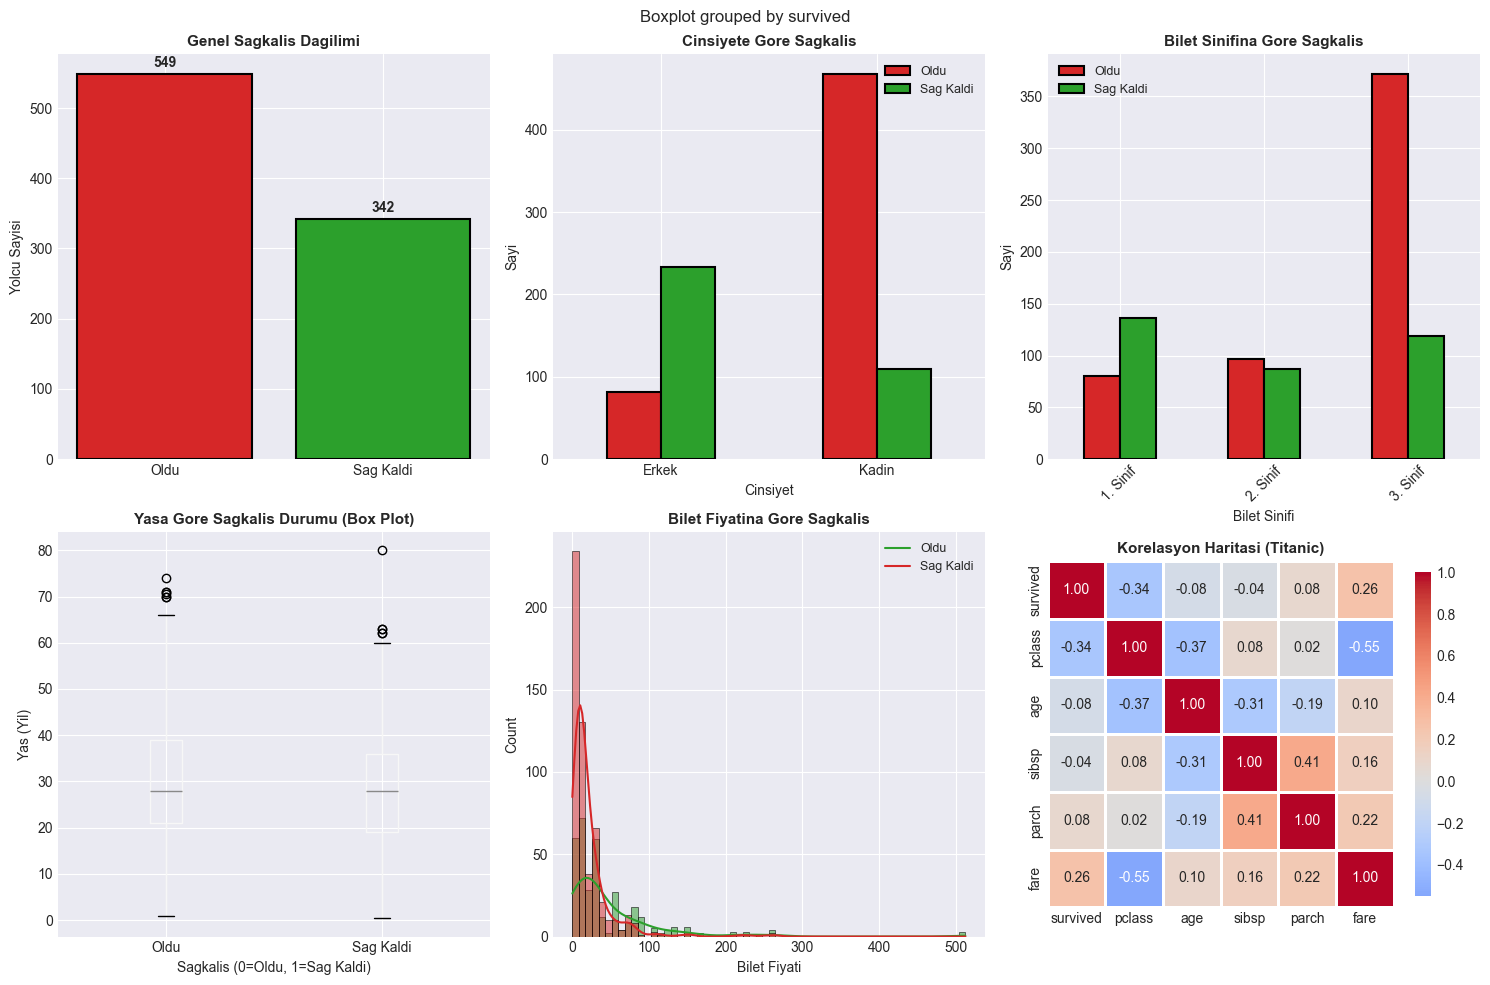


TITANIC VERI SETINDEN CIKARDIKLARI INSIGHTLAR:
----------------------------------------------------------------------
Sagkalis Orani: 38.4%
Kadinlarin Sagkalis Orani: 74.2%
Erkeklerin Sagkalis Orani: 18.9%
1. Sinif Yolcularinin Sagkalis Orani: 63.0%
3. Sinif Yolcularinin Sagkalis Orani: 24.2%

SONUC: Kadinlik ve yuksek bilet sinifi --> Sagkalis ihtimali UP


In [ ]:
# ============================================================================
# BÖLÜM 8: GERÇEKÇİ VERİ ANALİZİ - TITANIC VERİ SETİ ÜZERINDE EDA
# ============================================================================

print("\n" + "=" * 70)
print("GERCEKCI VERI ANALIZI: TITANIC VERI SETI")
print("=" * 70)

# --- 1. VERİ KEŞFI ---
print("\nADIM 1: VERI KESFI")
print("-" * 70)

nrows_t = titanic.shape[0]
ncols_t = titanic.shape[1]
print(f"Titanic Veri Seti Boyutu: {nrows_t} satir, {ncols_t} sutun")
print(f"\nIlk 5 Satir:")
print(titanic.head())

print(f"\n\nVERI TURLERI VE EKSIK VERI:")
print("-" * 70)
print(titanic.info())

print(f"\n\nEKSIK VERI OZET:")
print("-" * 70)
missing_data = pd.DataFrame({
    'Sutun': titanic.columns,
    'Eksik_Sayi': titanic.isnull().sum(),
    'Eksik_Yuzde': (titanic.isnull().sum() / len(titanic) * 100).round(2)
})
print(missing_data[missing_data['Eksik_Sayi'] > 0].sort_values('Eksik_Yuzde', ascending=False))

# --- 2. SAĞKALIŞI GÖSTEREN VİZUALİZASYON ---
print("\n\nADIM 2: SAGKALISI ANALIZI")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 2.1 Genel Sağkalış Dağılımı (survived küçük harfle!)
survived_counts = titanic['survived'].value_counts()
colors_survived = ['#d62728', '#2ca02c']
axes[0, 0].bar(['Oldu', 'Sag Kaldi'], survived_counts.sort_index().values, color=colors_survived, edgecolor='black', linewidth=1.5)
axes[0, 0].set_title('Genel Sagkalis Dagilimi', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Yolcu Sayisi', fontsize=10)
for i, v in enumerate(survived_counts.sort_index().values):
    axes[0, 0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2.2 Cinsiyete Göre Sağkalış
sex_survival = pd.crosstab(titanic['sex'], titanic['survived'])
sex_survival.plot(kind='bar', ax=axes[0, 1], color=['#d62728', '#2ca02c'], edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('Cinsiyete Gore Sagkalis', fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel('Cinsiyet', fontsize=10)
axes[0, 1].set_ylabel('Sayi', fontsize=10)
axes[0, 1].legend(['Oldu', 'Sag Kaldi'], fontsize=9)
axes[0, 1].set_xticklabels(['Erkek', 'Kadin'], rotation=0)

# 2.3 Sınıfa Göre Sağkalış
pclass_survival = pd.crosstab(titanic['pclass'], titanic['survived'])
pclass_survival.plot(kind='bar', ax=axes[0, 2], color=["#E92929", '#2ca02c'], edgecolor='black', linewidth=1.5)
axes[0, 2].set_title('Bilet Sinifina Gore Sagkalis', fontsize=11, fontweight='bold')
axes[0, 2].set_xlabel('Bilet Sinifi', fontsize=10)
axes[0, 2].set_ylabel('Sayi', fontsize=10)
axes[0, 2].legend(['Oldu', 'Sag Kaldi'], fontsize=9)
axes[0, 2].set_xticklabels(['1. Sinif', '2. Sinif', '3. Sinif'], rotation=45)

# 2.4 Yaş Dağılımı (Sağkalış Durumuna Göre)
titanic.dropna(subset=['age']).boxplot(column='age', by='survived', ax=axes[1, 0])
axes[1, 0].set_title('Yasa Gore Sagkalis Durumu (Box Plot)', fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel('Sagkalis (0=Oldu, 1=Sag Kaldi)', fontsize=10)
axes[1, 0].set_ylabel('Yas (Yil)', fontsize=10)
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Oldu', 'Sag Kaldi'])

# 2.5 Bilet Fiyatı Dağılımı
sns.histplot(data=titanic, x='fare', hue='survived', kde=True, ax=axes[1, 1], palette=['#d62728', '#2ca02c'])
axes[1, 1].set_title('Bilet Fiyatina Gore Sagkalis', fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('Bilet Fiyati', fontsize=10)
axes[1, 1].legend(['Oldu', 'Sag Kaldi'], fontsize=9)

# 2.6 Korelasyon Heatmap
numeric_titanic = titanic.select_dtypes(include=[np.number])
corr_titanic = numeric_titanic.corr()
sns.heatmap(corr_titanic, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 2], 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
axes[1, 2].set_title('Korelasyon Haritasi (Titanic)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# --- 3. İNSİGHTLAR (BULGULAR) ---
print("\nTITANIC VERI SETINDEN CIKARDIKLARI INSIGHTLAR:")
print("-" * 70)
survival_rate = (titanic['survived'].sum() / len(titanic) * 100)
female_survival = (titanic[titanic['sex']=='female']['survived'].mean() * 100)
male_survival = (titanic[titanic['sex']=='male']['survived'].mean() * 100)
class1_survival = (titanic[titanic['pclass']==1]['survived'].mean() * 100)
class3_survival = (titanic[titanic['pclass']==3]['survived'].mean() * 100)

print(f"Sagkalis Orani: {survival_rate:.1f}%")
print(f"Kadinlarin Sagkalis Orani: {female_survival:.1f}%")
print(f"Erkeklerin Sagkalis Orani: {male_survival:.1f}%")
print(f"1. Sinif Yolcularinin Sagkalis Orani: {class1_survival:.1f}%")
print(f"3. Sinif Yolcularinin Sagkalis Orani: {class3_survival:.1f}%")
print(f"\nSONUC: Kadinlik ve yuksek bilet sinifi --> Sagkalis ihtimali UP")

In [ ]:
# ============================================================================
# BÖLÜM 8.2: KENDİ EMLAK VERİ SETİ ANALİZİ (TÜRKIYE EMLAK FİYATLARI)
# ============================================================================

print("\n\n" + "=" * 70)
print("🏠 EMLAK VERİ SETİ ANALİZİ (Türkiye Ev Fiyatları)")
print("=" * 70)

# Eğer dataset.csv yüklenebildiyse:
if not df.empty and len(df) > 10:
    print("\n✅ Dataset.csv başarıyla yüklendi. Analiz devam ediliyor...")
    
    # --- 1. VERİ KEŞFI ---
    print("\n📋 ADIM 1: VERİ KEŞFI")
    print("-" * 70)
    print(f"Veri Seti Boyutu: {df.shape[0]} satır × {df.shape[1] sütun")
    print(f"\nSütunlar ve Türleri:")
    print(df.dtypes)
    print(f"\nBaşlangıç Satırlar:")
    print(df.head())
    print(f"\nTemel İstatistikler:")
    print(df.describe())
    
    # --- 2. FİYAT ANALİZİ ---
    print("\n\n📊 ADIM 2: FİYAT ANALİZİ")
    print("-" * 70)
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Fiyat Dağılımı
    axes[0, 0].hist(df['Fiyat'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Ev Fiyatları Dağılımı', fontsize=11, fontweight='bold')
    axes[0, 0].set_xlabel('Fiyat (Türk Lirası)', fontsize=10)
    axes[0, 0].set_ylabel('Sayı', fontsize=10)
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Ev Büyüklüğü vs Fiyat
    axes[0, 1].scatter(df['Ev_Buyuklugu'], df['Fiyat'], alpha=0.6, s=100, color='green')
    axes[0, 1].set_title('Ev Büyüklüğü vs Fiyat', fontsize=11, fontweight='bold')
    axes[0, 1].set_xlabel('Ev Büyüklüğü (m²)', fontsize=10)
    axes[0, 1].set_ylabel('Fiyat (Türk Lirası)', fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Konuma Göre Fiyat Karşılaştırması
    if 'Konum' in df.columns:
        konum_fiyat = df.groupby('Konum')['Fiyat'].mean().sort_values(ascending=False)
        axes[1, 0].bar(konum_fiyat.index, konum_fiyat.values, color=['#d62728', '#ff7f0e', '#2ca02c'], 
                       edgecolor='black', linewidth=1.5)
        axes[1, 0].set_title('Konuma Göre Ortalama Fiyat', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel('Ortalama Fiyat (Türk Lirası)', fontsize=10)
        axes[1, 0].grid(axis='y', alpha=0.3)
        for i, v in enumerate(konum_fiyat.values):
            axes[1, 0].text(i, v + 50000, f'{v:,.0f}', ha='center', fontweight='bold', fontsize=9)
    
    # Oda Sayısına Göre Fiyat
    if 'Oda_Sayisi' in df.columns:
        oda_group = df.groupby('Oda_Sayisi')['Fiyat'].mean()
        axes[1, 1].plot(oda_group.index, oda_group.values, marker='o', linewidth=2, markersize=8, color='purple')
        axes[1, 1].set_title('Oda Sayısına Göre Ortalama Fiyat', fontsize=11, fontweight='bold')
        axes[1, 1].set_xlabel('Oda Sayısı', fontsize=10)
        axes[1, 1].set_ylabel('Ortalama Fiyat (Türk Lirası)', fontsize=10)
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # --- 3. KORELASYON ANALİZİ ---
    print("\n\n🔗 ADIM 3: KORELASYON ANALİZİ")
    print("-" * 70)
    
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
    ax.set_title('Korelasyon Haritası (Emlak Veri Seti)', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\nKorelasyon Katsayıları (Fiyat ile ilişki):")
    price_corr = corr_matrix['Fiyat'].sort_values(ascending=False)
    for var, corr_val in price_corr.items():
        if var != 'Fiyat':
            print(f"  • {var}: {corr_val:+.3f}")
    
    print("\n💡 İNSİGHTLAR:")
    print(f"✓ Ortalama Ev Fiyatı: {df['Fiyat'].mean():,.0f} Türk Lirası")
    print(f"✓ En Pahalı Ev: {df['Fiyat'].max():,.0f} Türk Lirası")
    print(f"✓ En Ucuz Ev: {df['Fiyat'].min():,.0f} Türk Lirası")
    if 'Konum' in df.columns:
        en_pahalı_konum = df.groupby('Konum')['Fiyat'].mean().idxmax()
        print(f"✓ En Pahalı Konum: {en_pahalı_konum}")
    
else:
    print("\n⚠️ Emlak veri seti yüklenemedi. Örnek analiz yapılıyor...")
    print("Tips veri seti ile devam ediyoruz.")

---

## 🎯 BÖLÜM 9: PROFESYONEL GRAFİK ÖZELLEŞTIRMESI

### 9.1 Matplotlib Özelleştirme Seçenekleri

```python
# Renk (Color)
fig, ax = plt.subplots()
ax.plot(x, y, color='red')  # Veya c='#FF0000', c='crimson'

# Çizgi Türü (Line Style)
ax.plot(x, y, linestyle='--')  # - (solid), -- (dashed), -. (dash-dot), : (dotted)

# Çizgi Kalınlığı (Line Width)
ax.plot(x, y, linewidth=2.5)  # Veya lw=2.5

# Marker Tipi (Nokta)
ax.plot(x, y, marker='o')  # 'o' (daire), 's' (kare), '^' (üçgen), '*' (yıldız)

# Şeffaflık (Alpha)
ax.scatter(x, y, alpha=0.5)  # 0 (tam şeffaf) - 1 (tam opak)

# Başlık ve Etiketler
ax.set_title('Başlık', fontsize=14, fontweight='bold')
ax.set_xlabel('X Ekseni', fontsize=12)
ax.set_ylabel('Y Ekseni', fontsize=12)

# Figür Boyutu
fig, ax = plt.subplots(figsize=(12, 6))  # width, height

# İstatistiksel Hata Çubukları
ax.bar(categories, values, yerr=errors)  # Y ekseni üzerinde hata göster

# Grid
ax.grid(True, alpha=0.3)  # Grid göster, şeffaflık=0.3
```

### 9.2 Renk Paletleri ve Tercihler

| Palet | Kullanım | Örnek |
|-------|----------|-------|
| `'viridis'` | Bilimsel grafikleri (renk körü arkadaş dostu) | `cmap='viridis'` |
| `'coolwarm'` | Korelasyon (mavi=negatif, kırmızı=pozitif) | `cmap='coolwarm'` |
| `'Set1'` | Kategorik veri (renkli ve ayırt edilebilir) | `palette='Set1'` |
| `'husl'` | Harmonik renk dağılımı | `palette='husl'` |
| `'RdYlGn'` | Kötü-Orta-İyi (Kırmızı-Sarı-Yeşil) | `cmap='RdYlGn'` |

### 9.3 Grafik Tasarım İpuçları

**ÖNERİLER ✅**
- Başlık MUTLAKA olmalı
- Eksen etiketleri açık ve tamamlanmış olmalı
- Grid kullanın ama hafif alpha ile
- Yazı tipi boyutu tutarlı olmalı
- Renk körü insanlar da grafiği anlayabilmeli (koyu/açık fark)

**KAÇINILMASI GEREKEN ❌**
- 3D çubuk grafikler (çok karmaşık)
- Çok fazla renk (4-5'ten fazla)
- Dekorasyon (gölgeler, 3D efektleri)
- İmam Hatip yazıları
- Eksik başlıklar ve etiketler

### 9.4 Subplots Kullanımı

```python
# 2x3 grid (2 satır, 3 sütun)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0, 0].plot(x1, y1)  # Sol üst
axes[0, 1].plot(x2, y2)  # Orta üst
axes[0, 2].plot(x3, y3)  # Sağ üst
axes[1, 0].plot(x4, y4)  # Sol alt
# ... devam eder

plt.tight_layout()  # Aralar düzeltilir
```

---

In [1]:
# ============================================================================
# BÖLÜM 9: PROFESYONEL GRAFİK ÖZELLEŞTIRMESI - UYGULAMALI
# ============================================================================

print("\n" + "=" * 70)
print("🎨 PROFESYONEL GRAFİK ÖZELLEŞTIRMESI")
print("=" * 70)

# --- 1. RENKLER, STILLER, BOYUTLAR ---
print("\n1️⃣ MATPLOTLIB ÖZELLEŞTIRME SEÇENEKLERI")
print("-" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Örnek 1: Farklı Çizgi Stilleri
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

axes[0, 0].plot(x, y1, linestyle='-', linewidth=2.5, label='Düz Çizgi (solid)', color='blue')
axes[0, 0].plot(x, y2, linestyle='--', linewidth=2.5, label='Kesik Çizgi (dashed)', color='red')
axes[0, 0].set_title('Çizgi Stilleri Karşılaştırması', fontsize=11, fontweight='bold')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# Örnek 2: Marker Tipleri
y = np.random.rand(10)
x_mark = np.arange(10)
axes[0, 1].scatter(x_mark, y, marker='o', s=200, alpha=0.6, label='Daire', color='green')
axes[0, 1].scatter(x_mark + 0.05, y + 0.05, marker='s', s=200, alpha=0.6, label='Kare', color='orange')
axes[0, 1].scatter(x_mark + 0.1, y + 0.1, marker='^', s=200, alpha=0.6, label='Üçgen', color='purple')
axes[0, 1].set_title('Marker (Nokta) Tipleri', fontsize=11, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].set_ylim(-0.1, 1.3)

# Örnek 3: Şeffaflık (Alpha) Etkisi
for alpha in np.linspace(0.2, 1.0, 5):
    axes[1, 0].scatter(np.random.rand(10), np.random.rand(10), s=200, alpha=alpha, 
                      label=f'Alpha = {alpha:.1f}', color='blue')
axes[1, 0].set_title('Şeffaflık (Alpha) Seviyeleri', fontsize=11, fontweight='bold')
axes[1, 0].legend(fontsize=8, loc='upper right')

# Örnek 4: Renk Paleti
colors = plt.cm.RdYlGn(np.linspace(0, 1, 8))
for i, color in enumerate(colors):
    axes[1, 1].bar(i, i+1, color=color, edgecolor='black', linewidth=1.5)
axes[1, 1].set_title('RdYlGn Renk Paleti', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Değer', fontsize=10)
axes[1, 1].set_xlabel('Kategori', fontsize=10)

plt.tight_layout()
plt.show()

print("✅ Özelleştirme seçenekleri başarıyla gösterildi!")

# --- 2. KOMPLEKS SUBPLOT ÖRNEK ---
print("\n2️⃣ KOMPLEKS SUBPLOT DÜZENI (GridSpec ile)")
print("-" * 70)

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# Ana grafikler
ax_main = fig.add_subplot(gs[0:2, 0:2])  # Sol üst (büyük alan)
ax_hist_x = fig.add_subplot(gs[2, 0:2])   # Alt (histogram)
ax_hist_y = fig.add_subplot(gs[0:2, 2])   # Sağ (histogram)

# Scatter plot (ana)
x_data = np.random.randn(300)
y_data = 2 * x_data + np.random.randn(300)
ax_main.scatter(x_data, y_data, alpha=0.5, s=30, color='blue')
ax_main.set_title('Temel Scatter Plot', fontsize=11, fontweight='bold')
ax_main.set_xlabel('X Değişkeni', fontsize=10)
ax_main.set_ylabel('Y Değişkeni', fontsize=10)
ax_main.grid(True, alpha=0.3)

# X histogram
ax_hist_x.hist(x_data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax_hist_x.set_ylabel('Frekans', fontsize=9)
ax_hist_x.set_title('X Dağılımı', fontsize=10)

# Y histogram (dikey)
ax_hist_y.hist(y_data, bins=30, orientation='horizontal', color='lightcoral', edgecolor='black', alpha=0.7)
ax_hist_y.set_xlabel('Frekans', fontsize=9)
ax_hist_y.set_title('Y Dağılımı', fontsize=10)

plt.suptitle('Advanced Subplot: Scatter + Marginal Histograms', fontsize=12, fontweight='bold', y=0.98)
plt.show()

print("✅ GridSpec ile kompleks layout başarıyla oluşturuldu!")

# --- 3. ANNOTASYON VE METIN EKLEMESİ ---
print("\n3️⃣ ANNOTASYON (Metin ve Ok İşaretleri)")
print("-" * 70)

fig, ax = plt.subplots(figsize=(10, 6))

# Veri
x = np.arange(1, 11)
y = np.array([2, 5, 8, 12, 15, 14, 18, 22, 21, 25])

# Plot
ax.plot(x, y, marker='o', linewidth=2.5, markersize=8, color='darkblue', label='Satışlar')

# En yüksek ve en düşük noktaları annotasyon
max_idx = np.argmax(y)
min_idx = np.argmin(y)

ax.annotate('En Yüksek\n(' + str(y[max_idx]) + ')', 
           xy=(x[max_idx], y[max_idx]), 
           xytext=(x[max_idx] + 1, y[max_idx] + 2),
           fontsize=9, fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', color='red', lw=2))

ax.annotate('En Düşük\n(' + str(y[min_idx]) + ')', 
           xy=(x[min_idx], y[min_idx]), 
           xytext=(x[min_idx] - 1.5, y[min_idx] - 3),
           fontsize=9, fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7),
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.3', color='blue', lw=2))

ax.set_title('Annotasyon Örneği: Veri Noktalarını İşaretleme', fontsize=12, fontweight='bold')
ax.set_xlabel('Ay', fontsize=10)
ax.set_ylabel('Satış (Bin USD)', fontsize=10)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Annotasyon başarıyla gösterildi!")


🎨 PROFESYONEL GRAFİK ÖZELLEŞTIRMESI

1️⃣ MATPLOTLIB ÖZELLEŞTIRME SEÇENEKLERI
----------------------------------------------------------------------


NameError: name 'plt' is not defined

In [ ]:
# ============================================================================
# BÖLÜM 10: BEST PRACTICES VE ORTAK HATALAR
# ============================================================================

print("\n" + "=" * 70)
print("🚀 BEST PRACTICES VE ORTAK HATALAR")
print("=" * 70)

print("""
╔════════════════════════════════════════════════════════════════════════╗
║ ✅ YAPMAMIZ GEREKEN (BEST PRACTICES)                                   ║
╚════════════════════════════════════════════════════════════════════════╝

1. BAŞLIK KOYMAK
   ✅ Doğru:    plt.title('Aylık Satış Eğilimi (2023)', fontsize=14)
   ❌ Yanlış:   plt.plot(x, y)  # Başlık yok

2. EKSEN ETİKETLERİ
   ✅ Doğru:    ax.set_xlabel('Aylar', fontsize=11)
   ❌ Yanlış:   ax.set_xlabel('Month')  # İngilizce veya eksik

3. LEGEND (EFSANE)
   ✅ Doğru:    ax.legend(fontsize=10, loc='upper right')
   ❌ Yanlış:   İçinde birden fazla veri olup legend yok

4. RENKLENDİRME
   ✅ Doğru:    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
   ❌ Yanlış:   Çok fazla renk (7+), renk körü arkadaşını unutma

5. BOYUT UYARLAMA
   ✅ Doğru:    figsize=(12, 6)  # Geniş ve görülebilir
   ❌ Yanlış:   figsize=(5, 3)  # Çok küçük, okunamıyor

6. GRID KULLANMAK
   ✅ Doğru:    ax.grid(True, alpha=0.3)  # Hafif grid
   ❌ Yanlış:   Grid yok veya çok koyu

7. VERI DOĞRULUĞU
   ✅ Doğru:    NaN değerler silindi, outlier kontrol edildi
   ❌ Yanlış:   Eksik veriler göz ardı edildi, aykırı değerler gözardı

8. TASARIM BİRLİĞİ
   ✅ Doğru:    Tüm grafikler aynı stil/font/tema
   ❌ Yanlış:   Her grafik farklı stilde

╔════════════════════════════════════════════════════════════════════════╗
║ ❌ ORTAK HATALAR (ÖZENDİKLERİ KAÇIN)                                   ║
╚════════════════════════════════════════════════════════════════════════╝

1. 3D EFEKTLER KULLANMAK
   ❌ Dönen ve 3D grafikleri gösterişli sanıyor ama okunaklılığı düşürüyor

2. ÇOK FAZLA RENK
   ❌ 'Kültür Sanat Merkezi' misiniz? 4-5 renkten fazla kullanmayın

3. BAŞLIKUSUZ GRAFIK
   ❌ Grafik ne hakkında olduğu belli olmuyorsa kimse anlamaz

4. AYKIRI DEĞERLERİ İGNORE ETMEK
   ❌ Outlier'ları görmezden gelmeyin, belki önemlidir!

5. ÇOK FAZLA VERİ SIKIŞTIRMAK
   ❌ 100+ veri noktası bir scatter plot'a sıkıştırmak → spaghetti
   💡 Çözüm: Transparency (alpha), hexbin plot, density plot

6. YANLIŞ GRAFİK TÜRÜ SEÇİMİ
   ❌ Kategorik veri için line chart (yanlış)
   ✅ Kategorik veri için bar chart (doğru)

7. EXPORTING SORUNU
   ❌ plt.savefig('grafik.png', dpi=50)  # Çok düşük çözünürlük
   ✅ plt.savefig('grafik.png', dpi=300)  # Yüksek kalite

8. İSTATİSTİK HATASI
   ❌ Korelasyon = Nedensellik düşüncesi (BIG MISTAKE!)
   ✅ "Korelasyon olması → nedenselliğe işaret eder" (dikkat!)

╔════════════════════════════════════════════════════════════════════════╗
║ 📋 HIZLI KONTROL LİSTESİ (Grafik Oluşturduktan Sonra)                   ║
╚════════════════════════════════════════════════════════════════════════╝

□ Başlık var mı? ("Ne hakkında bu grafik?")
□ Eksen etiketleri var mı? ("Bunlar ne ölçüyor?")
□ Birim gösterildi mi? (USD, %, ton, vb.)
□ Renk körü arkadaş bile anlar mı? (Yeterli kontras var mı?)
□ Figür boyutu yeterli mi? (Yazı okunaklı mı?)
□ İmam Hatip yazısı kullandım mı? ❌ (Kullanma!)
□ Veri kaynaklı mı gösterildi? (Güven ve kredibilite)
□ Grafikten çıkardığı sonuç yazıldı mı? (Bu ne demek?)
□ Overplotting sorunu var mı? (Noktalar üst üste mı?)
□ Eksik veriler göz ardı mı edildi? (Belirtildi mi?)

""")

print("\n✅ HEPSI BIT GİRDİ!")

---

## 🎯 BÖLÜM 11: ÖZET VE SONUÇ (9 dakika)

### 11.1 Öğrendiklerimiz - Konu Özeti

#### **BÖLÜM 1: TEMELLER **
- Veri görselleştirme nedir ve neden önemli?
- "Bir resim bin kelimeye bedeldir"
- Matplotlib vs Seaborn seçimi

#### **BÖLÜM 2: GRAFİK SEÇİMİ **
**Karar Ağacı:** 
- Kaç değişken? 1 → Dağılım, 2 → İlişki, 3+ → Heatmap
- Ne tür veri? Kategorik → Bar Chart, Sayısal → Histogram
- Amacı ne? Dağılım, Trend, İlişki, Karşılaştırma?

#### **BÖLÜM 3: MATPLOTLIB TEMELLERİ **
- Figure, Axes, Artist kavramları
- Plot, Scatter, Bar, Histogram, Box Plot
- Object-Oriented vs Function API

#### **BÖLÜM 4: DAĞILIM ANALİZİ**
- Histogram + KDE
- Box Plot (Q1, Medyan, Q3, IQR, Outlier)
- Violin Plot

#### **BÖLÜM 5: KATEGORİK ANALİZ **
- Count Plot, Bar Plot
- `hue` Parametresi (Renk Kodlama)
- Stacked Bar (Bileşenleri görmek)

#### **BÖLÜM 6: KORELASYON **
- Heatmap (Renk ile korelasyon)
- Pairplot (Tüm çift kombinasyonları)
- Regplot (Trend çizgisi ile)
- FacetGrid (Kategoriye göre tekrarlama)

#### **BÖLÜM 7: GERÇEKÇİ ANALİZ **
- **Titanic:** Sağkalış tahmini (Ölümü vs Oda Sınıfı)
- **Emlak:** Ev Fiyatı analizi (Boyut vs Fiyat)
- EDA (Exploratory Data Analysis) süreci

#### **BÖLÜM 8: ÖZELLEŞTIRME **
- Renkler, Çizgi Stilleri, Marker Tipleri
- Subplots ve GridSpec
- Annotasyon (Metin ve Ok İşaretleri)

#### **BÖLÜM 9: BEST PRACTICES **
- Başlık, Eksen Etiketleri, Legend
- Renk Körü Arkadaş Dostu Tasarım
- Ortak Hatalar ve Çözümleri

---

### 11.2 Grafik Türlerinin Hızlı Referansı

```python
# DAĞILIM
plt.hist(data, bins=20)                    # Histogram
sns.distplot(data)                         # Dağılım (Histogram + KDE)
sns.boxplot(x=data)                        # Box Plot
sns.violinplot(x=data)                     # Violin Plot

# İLİŞKİ
plt.scatter(x, y)                          # Scatter Plot
sns.regplot(x=x, y=y, data=df)            # Scatter + Trendline
sns.heatmap(corr_matrix)                   # Korelasyon Heatmap

# KATEGORİK
sns.countplot(x='category', data=df)       # Kategori Frekansı
sns.barplot(x='cat', y='value', data=df)   # Kategorik Ortalama
plt.pie(values)                            # Pie Chart

# KOMBİNE
sns.pairplot(df)                           # Tüm İlişkiler
sns.FacetGrid(df, col='category')          # Tekrarlanan Grafikler

# ZAMAN SERİSİ
plt.plot(x, y)                             # Line Chart
```

---

### 11.3 Matplotlib'in Temel Yapısı (Hızlı Hatırlatma)

```python
import matplotlib.pyplot as plt

# Figure oluştur (tuval)
fig, ax = plt.subplots(figsize=(10, 6))

# Veri çiz (Artist objesi)
ax.plot(x, y, label='Veri')
ax.scatter(x, y, alpha=0.5)

# Başlık ve Etiketler
ax.set_title('Başlık')
ax.set_xlabel('X Ekseni')
ax.set_ylabel('Y Ekseni')

# Görünüm
ax.legend()
ax.grid(True, alpha=0.3)

# Kaydet ve Göster
plt.savefig('grafik.png', dpi=300, bbox_inches='tight')
plt.show()
```

---

### 11.4 Soruda Kalınacak Temel Sorular

**Grafik Hazırlamadan Önce Kendine Sor:**

1. **Ne görmek istiyorsun?**
   - Dağılım mı? → Histogram
   - İlişki mi? → Scatter
   - Karşılaştırma mı? → Bar Chart

2. **Veri Türü Nedir?**
   - Kategorik (Erkek/Kadın, Şehir) → Count/Bar Plot
   - Sayısal (Yaş, Gelir) → Histogram/Box Plot
   - Karışık → Box Plot or Violin Plot

3. **Hedef Kitle Kimdir?**
   - Akademisyen → Detaylı, Bilimsel
   - İş Müdürü → Basit, Sonuç Odaklı
   - Genel Halk → Çok Basit, Eğlenceli

4. **Grafik Okunaklı mı?**
   - Yazı büyük mü? (minimum 10pt)
   - Renk farkı belirgin mi? (renk körü test yap)
   - Başlık var mı? (MUTLAKA)
   - Eksik veri belirtildi mi?



### 11.5 Kaynaklar ve Faydalı Linkler

**Resmi Dokümantasyon:**
- Matplotlib: https://matplotlib.org/stable/contents.html
- Seaborn: https://seaborn.pydata.org/
- Pandas: https://pandas.pydata.org/docs/

**Bilgi Siteleri:**
- Python Visualization: https://www.kaggle.com/learn/data-visualization
- Real Python: https://realpython.com/python-matplotlib-guide/
- Towards Data Science: Medium'daki Data Visualization yazıları

**Renk Paleti Araçları:**
- Colorbrewer: https://colorbrewer2.org/
- Coolors: https://coolors.co/
- Adobe Color: https://color.adobe.com/

---


**Bu eğitim sonunda kazandıklarınız:**
✅ Python'da profesyonel grafikler çizebiliyorsunuz
✅ Veriden anlamlı pattern'ler bulabiliyorsunuz
✅ Sonuçları ekibinize etkili şekilde iletebiliyorsunuz
✅ Data Visualization uzmanı olmaya doğru ilk adımlar attınız


🏋️ PRATIK EGZERSIZLER - KENDİ ÇÖZÜMÜNÜZÜ YAZIN!

╔════════════════════════════════════════════════════════════════════════╗
║ EGZERSIZ 1: Basit Kategorik Karşılaştırma                             ║
╚════════════════════════════════════════════════════════════════════════╝

Görev: Tips veri setini kullanarak, beslenme türüne göre (lunch/dinner)
       ortalama hesap miktarını bar chart ile gösterin.

Beklenen Sonuç:
  • X ekseni: Meal Type (lunch/dinner)
  • Y ekseni: Ortalama Hesap
  • Başlık: Net ve anlaşılır
  • Renk: Farklı ve çekici

Çözüm (Gizli - Boşluğu Kendi Doldurun):

fig, ax = plt.subplots(figsize=_____)
meal_avg = tips.groupby('_____')['_____'].mean()
ax.bar(_____, _____, color='_____', edgecolor='black')
ax._____('Beslenme Türü')
ax._____('Ortalama Hesap (USD)')
ax._____('Beslenme Türüne Göre Ortalama Hesap')
plt.show()

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╔════════════════════════════════════════════════════════════════════════╗
║ EGZ

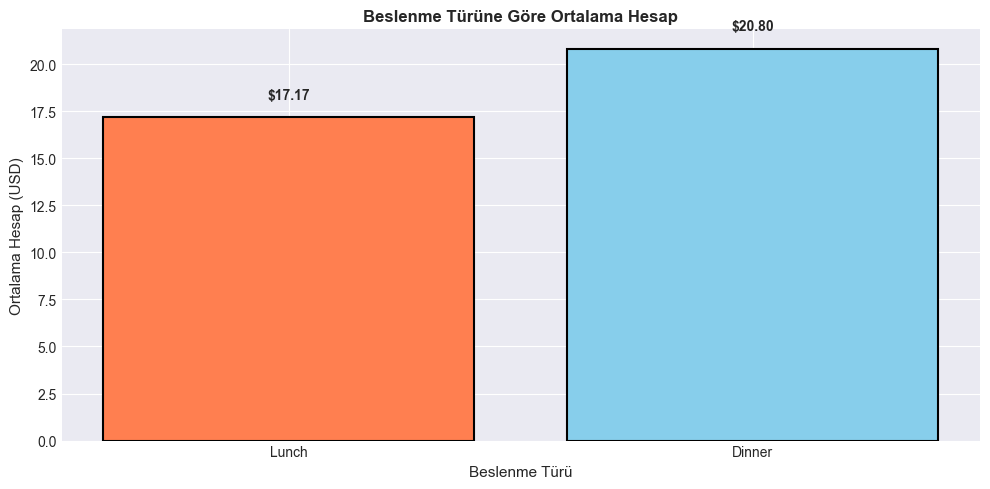


📌 EGZERSIZ 3 ÇÖZÜMÜ:


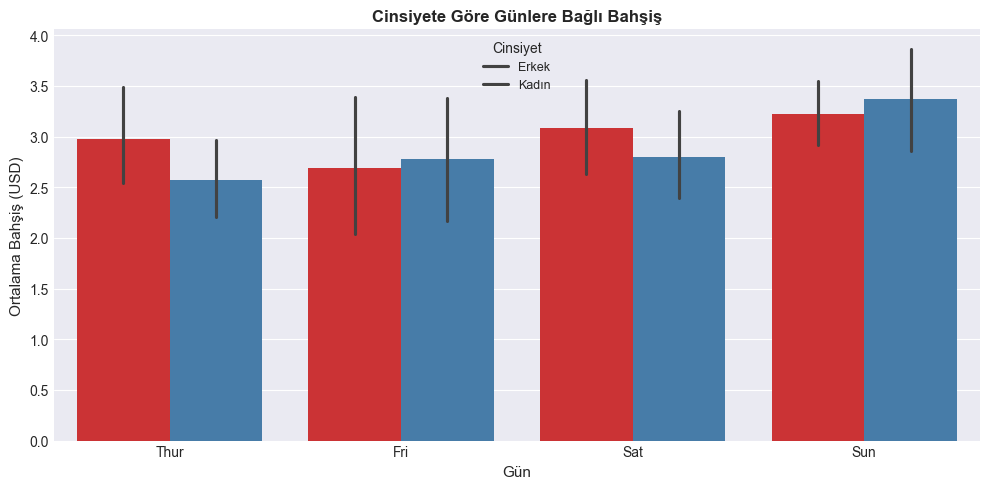


✅ ÖRNEK ÇÖZÜMLER TAMAMLANDI!

💡 Şimdi kendi çözümlerinizi yazın ve deneyin!


In [10]:
# ============================================================================
# BÖLÜM 12: PRATIK EGZERSIZLER (Öz-Test)
# ============================================================================

print("\n" + "=" * 70)
print("🏋️ PRATIK EGZERSIZLER - KENDİ ÇÖZÜMÜNÜZÜ YAZIN!")
print("=" * 70)

print("""
╔════════════════════════════════════════════════════════════════════════╗
║ EGZERSIZ 1: Basit Kategorik Karşılaştırma                             ║
╚════════════════════════════════════════════════════════════════════════╝

Görev: Tips veri setini kullanarak, beslenme türüne göre (lunch/dinner)
       ortalama hesap miktarını bar chart ile gösterin.

Beklenen Sonuç:
  • X ekseni: Meal Type (lunch/dinner)
  • Y ekseni: Ortalama Hesap
  • Başlık: Net ve anlaşılır
  • Renk: Farklı ve çekici

Çözüm (Gizli - Boşluğu Kendi Doldurun):

fig, ax = plt.subplots(figsize=_____)
meal_avg = tips.groupby('_____')['_____'].mean()
ax.bar(_____, _____, color='_____', edgecolor='black')
ax._____('Beslenme Türü')
ax._____('Ortalama Hesap (USD)')
ax._____('Beslenme Türüne Göre Ortalama Hesap')
plt.show()

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╔════════════════════════════════════════════════════════════════════════╗
║ EGZERSIZ 2: Scatter Plot + Regplot (İlişki Bulma)                     ║
╚════════════════════════════════════════════════════════════════════════╝

Görev: Size ve hesap arasında bir ilişki var mı? Scatter plot ve trend
       çizgisi ile gösterin (Titanic veri seti kullanın).

Beklenen Sonuç:
  • X ekseni: Grup Büyüklüğü
  • Y ekseni: Bahşiş (Tip)
  • Scatter noktaları + Trendline

Hint: sns.regplot() kullanın!

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╔════════════════════════════════════════════════════════════════════════╗
║ EGZERSIZ 3: Çok Boyutlu Analiz (Hue Parametresi)                      ║
╚════════════════════════════════════════════════════════════════════════╝

Görev: Cinsiyete göre günlere göre bahşiş karşılaştırması (3 Kategori!)

Beklenen Sonuç:
  • X ekseni: Günler (day)
  • Y ekseni: Bahşiş (tip)
  • Renk: Cinsiyet (sex) - hue parametresi kullanın!

Komut: sns.barplot(x='day', y='tip', hue='sex', data=tips)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╔════════════════════════════════════════════════════════════════════════╗
║ EGZERSIZ 4: Distribution (Dağılım) Analizi                            ║
╚════════════════════════════════════════════════════════════════════════╝

Görev: Bahşiş dağılımını 3 farklı yöntemle gösterin:
  1. Histogram
  2. Box Plot (kategoriye göre)
  3. Violin Plot

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╔════════════════════════════════════════════════════════════════════════╗
║ EGZERSIZ 5: Çok Sayıda Grafik (Subplots)                              ║
╚════════════════════════════════════════════════════════════════════════╝

Görev: 2x2 subplot grid'de Tips veri seti hakkında 4 grafik oluşturun:
  [0,0]: Hesap Dağılımı (Histogram)
  [0,1]: Gün Dağılımı (Count Plot)
  [1,0]: Hesap vs Bahşiş (Scatter)
  [1,1]: Cinsiyete Göre Hesap (Bar Plot)

Hint: 
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# ... sonra axes[0,0], axes[0,1], vb. kullanın

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╔════════════════════════════════════════════════════════════════════════╗
║ EGZERSIZ 6: Heatmap (Korelasyon)                                       ║
╚════════════════════════════════════════════════════════════════════════╝

Görev: Tips veri setinin sayısal değişkenleri arasındaki korelasyon
       haritasını çizin.

Hint:
numeric_tips = tips.select_dtypes(include=[np.number])
corr = numeric_tips.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Soru: Hangi değişkenler birbiri ile en kuvvetli ilişkiye sahip?

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

# ÇÖZÜM ÖRNEKLERI (İsteğe bağlı - Görünmesi için açıyoruz)
print("\n" + "=" * 70)
print("✅ ÖRNEK ÇÖZÜMLER (Kontrol için)")
print("=" * 70)

# Egzersiz 1 Çözümü
print("\n📌 EGZERSIZ 1 ÇÖZÜMÜ:")
fig, ax = plt.subplots(figsize=(10, 5))
meal_avg = tips.groupby('time')['total_bill'].mean()
ax.bar(meal_avg.index, meal_avg.values, color=['coral', 'skyblue'], edgecolor='black', linewidth=1.5)
ax.set_xlabel('Beslenme Türü', fontsize=11)
ax.set_ylabel('Ortalama Hesap (USD)', fontsize=11)
ax.set_title('Beslenme Türüne Göre Ortalama Hesap', fontsize=12, fontweight='bold')
for i, v in enumerate(meal_avg.values):
    ax.text(i, v + 1, f'${v:.2f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Egzersiz 3 Çözümü
print("\n📌 EGZERSIZ 3 ÇÖZÜMÜ:")
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='day', y='tip', hue='sex', data=tips, palette='Set1', ax=ax)
ax.set_title('Cinsiyete Göre Günlere Bağlı Bahşiş', fontsize=12, fontweight='bold')
ax.set_xlabel('Gün', fontsize=11)
ax.set_ylabel('Ortalama Bahşiş (USD)', fontsize=11)
ax.legend(title='Cinsiyet', labels=['Erkek', 'Kadın'], fontsize=9)
plt.tight_layout()
plt.show()

print("\n✅ ÖRNEK ÇÖZÜMLER TAMAMLANDI!")
print("\n💡 Şimdi kendi çözümlerinizi yazın ve deneyin!")

---

## 📚 BÖLÜM 13: KAYNAKLAR, İKİSİ DEFTERİ VE İPUÇLARI

### 13.1 Hızlı Referans Tablosu - Grafik Seçimi

| Amacı | Sayısal | Kategorik | İlişki |
|-------|---------|-----------|--------|
| **Dağılımı Görmek** | Histogram, KDE | Count Plot | - |
| **Aykırı Değer Bulmak** | Box Plot | - | Scatter |
| **Trendi Görmek** | Line Chart | Line Chart | Regplot |
| **Karşılaştırmak** | - | Bar Chart | - |
| **Korelasyon** | Heatmap | Heatmap | Pairplot |

### 13.2 Kütüphane Cheat Sheet

```python
# VERİ YÜKLEME
import pandas as pd
df = pd.read_csv('data.csv')

# GÖRSELLEŞTİRME
import matplotlib.pyplot as plt
import seaborn as sns

# TEMEL IŞLEMLER
tips.head()              # İlk 5 satır
tips.info()              # Veri türleri
tips.describe()          # İstatistikler
tips.isnull().sum()      # Eksik veriler
tips.groupby('x')['y'].mean()  # Gruplama

# GRAFİKLER
plt.plot(x, y)           # Çizgi
plt.scatter(x, y)        # Scatter
plt.bar(x, y)            # Bar
plt.hist(data)           # Histogram
sns.boxplot()            # Box Plot
sns.heatmap()            # Heatmap
sns.pairplot()           # Pairplot

# ÖZELLEŞTİRME
plt.title('Başlık')      # Başlık
plt.xlabel('X')          # X Ekseni
plt.ylabel('Y')          # Y Ekseni
plt.legend()             # Efsane
plt.grid()               # Grid
plt.tight_layout()       # Boşluk Düzenleme
plt.savefig('file.png')  # Kaydet
plt.show()               # Göster
```

### 13.3 Seaborn Stilleri

```python
# Global stil ayarı
sns.set_style("darkgrid")   # Koyu grid
sns.set_style("whitegrid")  # Beyaz grid
sns.set_style("dark")       # Koyu tema
sns.set_style("white")      # Beyaz tema
sns.set_style("ticks")      # Tick işaretleri

# Renk Paleti
sns.set_palette("husl")     # Harmonik renkler
sns.set_palette("Set2")     # Pastel renkler
sns.set_palette("coolwarm") # Sıcak-Soğuk
sns.set_palette("RdYlGn")   # Kötü-İyi
```

### 13.4 Ortak Matplotlib Renkleri

```python
# İsim ile
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

# Hex kodla
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

# RGB ile
colors = [(1, 0, 0), (0, 0, 1), (0, 1, 0)]  # Kırmızı, Mavi, Yeşil

# Matplotlib tarafından tanınan 11 tane temel renk
'b' = blue       'g' = green      'r' = red       'c' = cyan
'm' = magenta    'y' = yellow     'k' = black     'w' = white
```

### 13.5 Ortak Matplotlib Marker'ları

```
'o' = daire (circle)
's' = kare (square)
'^' = yukarı üçgen (triangle up)
'v' = aşağı üçgen (triangle down)
'<' = sol üçgen (triangle left)
'>' = sağ üçgen (triangle right)
'*' = yıldız (star)
'+' = artı (plus)
'x' = x işareti (x mark)
'X' = X işareti (X mark)
'D' = elmas (diamond)
'P' = pentagon
'H' = hexagon
'|' = dikey çizgi (vline)
'_' = yatay çizgi (hline)
```

### 13.6 Matplotlib Stil Komutları

```python
# Çizgi Stilleri
'-'   = solid line (düz çizgi)
'--'  = dashed line (kesik çizgi)
'-.'  = dash-dot line (kesik-nokta çizgisi)
':'   = dotted line (noktalı çizgi)

# Şeffaflık
alpha=0.3  (0=tamamen şeffaf, 1=tamamen opak)

# Çizgi Kalınlığı
linewidth=2.5  (veya lw=2.5)

# Marker Boyutu
markersize=10  (veya ms=10)

# Figür Boyutu
figsize=(width, height)  # inches cinsinden
```

### 13.7 NumPy Kullanışlı Fonksiyonlar

```python
np.linspace(0, 10, 100)     # 0-10 arasında 100 eşit nokta
np.random.rand(10)          # 0-1 arasında 10 rassal sayı
np.random.randn(10)         # Normal dağılımdan 10 rassal sayı
np.arange(0, 10, 2)         # 0'den 10'a 2'şer artım
np.array([1, 2, 3])         # Array oluştur
array.min(), array.max()    # Min, Max
array.mean(), array.std()   # Ortalama, Std Dev
```

### 13.8 Pandas Kullanışlı Fonksiyonları

```python
# Filtreleme
df[df['column'] > 100]      # Koşullu seçim
df[df['column'].isin(['A', 'B'])]  # Değerlere göre

# Gruplama
df.groupby('category')['value'].mean()   # Kategori başına ortalama
df.groupby('category')['value'].agg(['mean', 'sum', 'count'])

# Sütun Türleri
df.select_dtypes(include=[np.number])   # Sadece sayısal
df.select_dtypes(include=['object'])    # Sadece metin

# Korelasyon
df.corr()                   # Tüm korelasyonlar
df['A'].corr(df['B'])       # İki değişken arası

# Eksik Veriler
df.isnull().sum()           # Eksik sayısı
df.dropna()                 # Eksik satırları sil
df.fillna(0)                # Eksikleri 0 ile doldur
```

### 13.9 İnternet Kaynakları

**Resmi Dokümantasyon:**
- 📖 Matplotlib: https://matplotlib.org
- 📖 Seaborn: https://seaborn.pydata.org
- 📖 Pandas: https://pandas.pydata.org

**Eğitim Videoları:**
- 🎥 YouTube: "Python Data Visualization" araştır
- 🎥 Kaggle: https://kaggle.com/learn/data-visualization

**Renk Araçları:**
- 🎨 https://colorbrewer2.org/ (Bilimsel Renk Paletleri)
- 🎨 https://coolors.co/ (Renk Harmoni)

**Veri Kaynakları (Pratik için):**
- 📊 Kaggle: https://kaggle.com/datasets
- 📊 UCI Machine Learning: https://archive.ics.uci.edu
- 📊 Google Dataset Search: https://datasetsearch.research.google.com

---

## 🎬 BÖLÜM 14: İLERİ KONULAR (Meraklı Olanlar İçin)

### 14.1 İnteraktif Görselleştirme

```python
import plotly.express as px
import plotly.graph_objects as go

# İnteraktif scatter plot
fig = px.scatter(tips, x='total_bill', y='tip', hover_data=['sex'])
fig.show()

# İnteraktif bar chart
fig = px.bar(tips, x='day', y='total_bill', color='sex')
fig.show()
```

### 14.2 Dashboard Oluşturma

```python
import streamlit as st
import plotly.express as px

st.title("Emlak Fiyat Analizi Dashboard")
st.dataframe(df)

# İnteraktif grafik
fig = px.scatter(df, x='Ev_Buyuklugu', y='Fiyat', color='Konum')
st.plotly_chart(fig)
```

### 14.3 Animasyonlu Grafikler

```python
import matplotlib.animation as animation

fig, ax = plt.subplots()
def animate(frame):
    ax.clear()
    ax.plot(x[:frame], y[:frame])
    
ani = animation.FuncAnimation(fig, animate, frames=100, repeat=True)
plt.show()
```

---

## 🏆 FINAL SÖZCÜK

> **"Veri görselleştirme, kutsallaşt edilmiş kelimeyi sönük gerçekliğe, 
> gerçekliği mutlu çizgilere dönüştürme sanatıdır."** 
> 
> — Edward Tufte (Veri Görselleştirme Efsanesi)

**Başarılar dilerim! İyi Grafiklendirmeler! 📊**